In [1]:
import pandas as pd
import numpy as np

import os

from sklearn import linear_model, cross_validation, grid_search
from sklearn.tree import DecisionTreeClassifier

from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import  cross_val_score

In [2]:
#1. Get Data
col_names = ['Nbr_Pregnant','Plasma_Glucose','BP','Skin','Insulin','BMI','Pedigree','Age','Target']

diabetes_df = pd.read_csv('/home/shenbaga/data-files/pima-indians-diabetes.data', names=col_names)

In [3]:
diabetes_df.head()

,Nbr_Pregnant,Plasma_Glucose,BP,Skin,Insulin,BMI,Pedigree,Age,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_df.describe()

,Nbr_Pregnant,Plasma_Glucose,BP,Skin,Insulin,BMI,Pedigree,Age,Target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Nbr_Pregnant      768 non-null int64
Plasma_Glucose    768 non-null int64
BP                768 non-null int64
Skin              768 non-null int64
Insulin           768 non-null int64
BMI               768 non-null float64
Pedigree          768 non-null float64
Age               768 non-null int64
Target            768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
import seaborn as sns

In [7]:
%matplotlib inline

In [8]:
train = diabetes_df.sample(frac=0.8,random_state=200)
test = diabetes_df.drop(train.index)

In [9]:
#3. Split into features and target
X_train = train[['Nbr_Pregnant','Plasma_Glucose','BP','Skin','Insulin','BMI','Pedigree','Age']]
X_test = test[['Nbr_Pregnant','Plasma_Glucose','BP','Skin','Insulin','BMI','Pedigree','Age']]

y_train = train['Target'].values
y_test = test['Target'].values

In [10]:
X_train.head()

,Nbr_Pregnant,Plasma_Glucose,BP,Skin,Insulin,BMI,Pedigree,Age
355,9,165,88,0,0,30.4,0.302,49
667,10,111,70,27,0,27.5,0.141,40
390,1,100,66,29,196,32.0,0.444,42
356,1,125,50,40,167,33.3,0.962,28
269,2,146,0,0,0,27.5,0.240,28


In [11]:
# so far we have seen the performance of the simple decision tree
# next we move on to a Cross Validated Decision Tree
#5. Build a 10 fold CV Dtree

In [12]:
CV_Decision_Tree = DecisionTreeClassifier(min_samples_split=20, random_state=99)
CV_Decision_Tree_result = cross_validation.cross_val_score(CV_Decision_Tree, X_train, y_train, cv=10)

In [13]:
print CV_Decision_Tree_result.mean(), CV_Decision_Tree_result.std()

0.74126984127 0.0570983155685


In [14]:
#cross validation by itself is not a method to provide a better Decision Tree
# so we move on to GridSearchCV

In [15]:
# set of parameters to test
param_grid = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 20],
              "max_depth": [None, 2, 5, 10],
              "min_samples_leaf": [1, 5, 10],
              "max_leaf_nodes": [None, 5, 10, 20],
              }

In [16]:
#a simple dt to start off with
dt = DecisionTreeClassifier()

In [17]:
grid_search_DT = GridSearchCV(dt, param_grid=param_grid, cv=10)

In [18]:
#we do the grid search first and then do the fit
grid_search_DT.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [2, 10, 20], 'max_leaf_nodes': [None, 5, 10, 20], 'criterion': ['gini', 'entropy'], 'max_depth': [None, 2, 5, 10], 'min_samples_leaf': [1, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [19]:
type(grid_search_DT)

sklearn.grid_search.GridSearchCV

In [20]:
grid_search_DT.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_leaf_nodes': None,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

In [21]:
#the above would give the best params to be used for the decision tree
#build a decision tree using those params

In [22]:
Best_Grid_Search_DT = DecisionTreeClassifier(**grid_search_DT.best_params_)

In [23]:
#fit the train data to the above decision tree
Best_Grid_Search_DT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [24]:
#train accuracy:
Best_Grid_Search_DT.score(X_train, y_train)

0.83224755700325737

In [25]:
from sklearn import metrics

In [26]:
#test accuracy:
grid_search_predicted = Best_Grid_Search_DT.predict(X_test)
grid_search_actual = y_test

print(metrics.classification_report(grid_search_actual, grid_search_predicted))

             precision    recall  f1-score   support

          0       0.71      0.78      0.75        88
          1       0.67      0.58      0.62        66

avg / total       0.69      0.69      0.69       154



In [27]:
print(metrics.confusion_matrix(grid_search_actual, grid_search_predicted))

[[69 19]
 [28 38]]


In [28]:
#try with logistic regression

In [29]:
from sklearn import linear_model

In [30]:
log_reg = linear_model.LogisticRegression()

In [31]:
log_reg_CV = cross_val_score(log_reg, X_train, y_train)

In [32]:
log_reg_CV.mean(), log_reg_CV.std()

(0.75723396154578337, 0.024935799330007884)

In [33]:
param_grid_log_reg = {"C": [0.1, 1, 10, 100, 1000]}

In [34]:
log_reg2 = linear_model.LogisticRegression()

In [35]:
grid_search_log_reg = GridSearchCV(log_reg2, param_grid=param_grid_log_reg, cv=10)

In [36]:
#we do the grid search first and then do the fit
grid_search_log_reg.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000]}, pre_dispatch='2*n_jobs',
       refit=True, scoring=None, verbose=0)

In [37]:
Best_Grid_Search_log_reg = linear_model.LogisticRegression(**grid_search_log_reg.best_params_)

In [38]:
Best_Grid_Search_log_reg.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
Best_Grid_Search_log_reg.score(X_train, y_train)

0.79641693811074921

In [40]:
predicted_log_reg = Best_Grid_Search_log_reg.predict(X_test)

In [41]:
actual_log_reg = y_test

In [42]:
metrics.confusion_matrix(actual_log_reg, predicted_log_reg)

array([[77, 11],
       [32, 34]])

In [43]:
#take a look back at the DT conf matrix
print(metrics.confusion_matrix(grid_search_actual, grid_search_predicted))

[[69 19]
 [28 38]]


In [44]:
Best_Grid_Search_log_reg.score(X_test,y_test)

0.72077922077922074

In [45]:
Best_Grid_Search_DT.score(X_test, y_test)

0.69480519480519476

In [46]:
DT_conf_matrix = metrics.confusion_matrix(grid_search_actual, grid_search_predicted)

In [47]:
Log_Reg_conf_matrix = metrics.confusion_matrix(actual_log_reg, predicted_log_reg)

In [49]:
import matplotlib.pyplot as plt

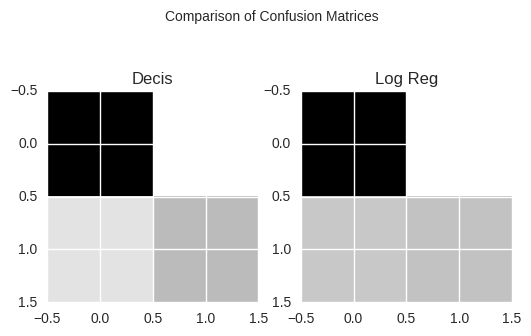

In [50]:
fig = plt.figure()
fig.suptitle("Comparison of Confusion Matrices", fontsize=10)

ax = plt.subplot("121")
ax.set_title("Decis")
ax.imshow(DT_conf_matrix, interpolation='none')

ax = plt.subplot("122")
ax.set_title("Log Reg")
ax.imshow(Log_Reg_conf_matrix, interpolation='none')

plt.show()

In [51]:
#27 nov 2016;
# do XGBoost in this data

In [52]:
import xgboost

In [53]:
# fit model to training data
model = xgboost.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [54]:
print model

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)


In [55]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 68.18%


In [59]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

In [61]:
from xgboost import XGBClassifier

In [62]:
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

In [63]:
gsearch1.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=140, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'max_depth': [3, 5, 7, 9], 'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [64]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.82102, std: 0.02596, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.82976, std: 0.02161, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.83276, std: 0.01898, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.81585, std: 0.02353, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.82075, std: 0.01783, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.82156, std: 0.02019, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.82060, std: 0.02887, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: 0.81625, std: 0.01808, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.82067, std: 0.01883, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.82342, std: 0.02004, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: 0.81684, std: 0.01646, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: 0.82140, std: 0.01756, params: {'max_depth': 9, 'min_child_weight': 5}],
 {'max_depth': 3, 'min_child_weight': 5

In [65]:
gsearch1.best_params_

{'max_depth': 3, 'min_child_weight': 5}

In [66]:
xgbGS = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
 min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

In [67]:
xgbGS.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=5, missing=None, n_estimators=140, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8)

In [68]:
predicted_xgbGS = xgbGS.predict(X_test)
predictionsxgbGS = [round(value) for value in predicted_xgbGS]

In [69]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictionsxgbGS)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 70.13%


In [70]:
#conf matrix of XGB Tree
print(metrics.confusion_matrix(y_test, predictionsxgbGS))

[[69 19]
 [27 39]]


In [71]:
#conf matrix of plain DT
print(metrics.confusion_matrix(grid_search_actual, grid_search_predicted))

[[69 19]
 [28 38]]


In [72]:
#we see pretty similar results for both XGB and simple DT

In [76]:
#play around with more parameters for the XGB
param_grid_XGB2 = {
    'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05],
     'max_depth':range(3,10,2),
     'min_child_weight':range(1,6,2),
    'subsample':[i/100.0 for i in range(75,90,5)],
    'colsample_bytree':[i/100.0 for i in range(75,90,5)],
    'gamma':[i/10.0 for i in range(0,5)],
    'learning_rate': [0.01, 0.05, 0.1]
}

In [77]:
gsearch2 = GridSearchCV(estimator = XGBClassifier(n_estimators=140,
                                                  objective= 'binary:logistic',
                                                  nthread=4,
                                                  scale_pos_weight=1,
                                                  seed=27
                                                 ),
                        param_grid = param_grid_XGB2,
                        scoring='roc_auc',n_jobs=4,iid=False, cv=5)

In [78]:
gsearch2.fit(X_train, y_train)

KeyboardInterrupt: 

In [79]:
#above command ran for more than 4 hours. so, cancelled it.
#we can edit the parameters in the grid to reduce the run time